<a href="https://colab.research.google.com/github/GalaRusina/Proyecto_Clustering_pinguinos/blob/main/Proyecto_Clustering_Pinguinos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto aplico diferentes algoritmos de clasterización para agrupación de los pingüinos segun sus características como longitud y profundidad del pico, longitud de aleta y la masa corporal.  
Vamos a estudiar mediante clustering cuantos grupos de pinguinos hay en los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
! gdown 1TwJk_ebVUUSt_ASIMZNqRmw59kuM2zTl

Downloading...
From: https://drive.google.com/uc?id=1TwJk_ebVUUSt_ASIMZNqRmw59kuM2zTl
To: /content/penguins_size.csv
100% 6.77k/6.77k [00:00<00:00, 10.0MB/s]


In [4]:
penguins = pd.read_csv('/content/penguins_size.csv')


Compruebo los 5 primeros elementos del dataframe.

In [5]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [6]:
penguins.shape 

(344, 4)

Comprueba cuantos missing values tiene cada columna

In [7]:
penguins.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

Dado el número de datos podemos permitirnos eliminar aquellas filas con missing values

In [8]:
penguins = penguins.dropna()

In [9]:
penguins.shape

(342, 4)

#Ejercicio 1 dendograma

Realiza el dendograma para agrupar a los pinguinos según la longitud del pico, profundidad del pico, longitud de aletas y masa corporal.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)


In [11]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [12]:
X=penguins.values

In [13]:
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

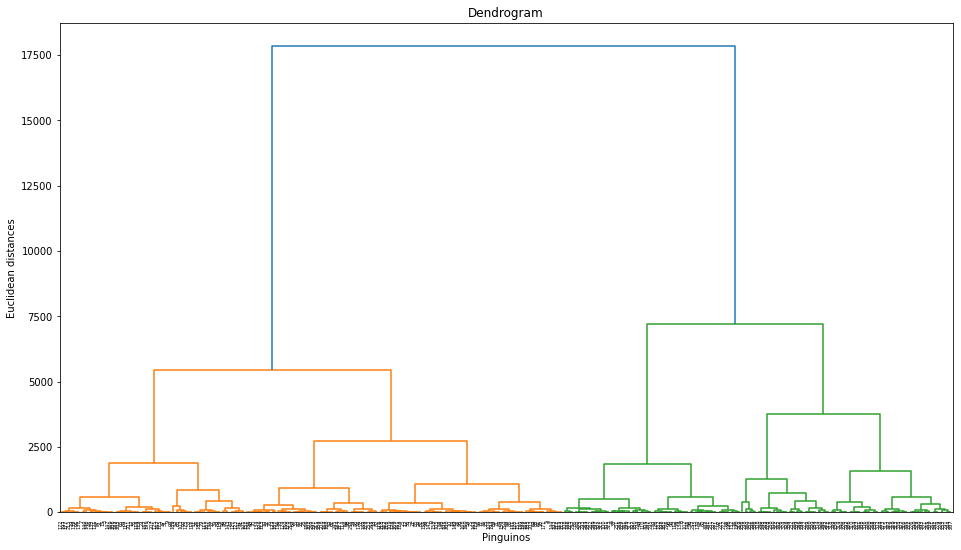

In [14]:
# Usamos el dendrograma para encontrar el número óptimo de clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Pinguinos')
plt.ylabel('Euclidean distances')
plt.show()

Según el dendograma hay 2 tipos de pingüinos

#Ejercicio 2 Clustering Aglomerativo

Vamos a crear el modelo de clusterring aglomerativo de sklearn

In [15]:
# Importamos el algoritmo de sklearn
from sklearn.cluster import AgglomerativeClustering



Represento la longitud de pico frente a profundidad de pico y la longitud de aleta frente a masa corporal.

In [16]:
# Definimos 2 clusters, con similitud euclidea
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [17]:
colores=['red','green']
asignar=[]
for row in y_hc:
    asignar.append(colores[row])

Text(0.5, 1.0, 'Longitud de pico frente a profundidad de pico')

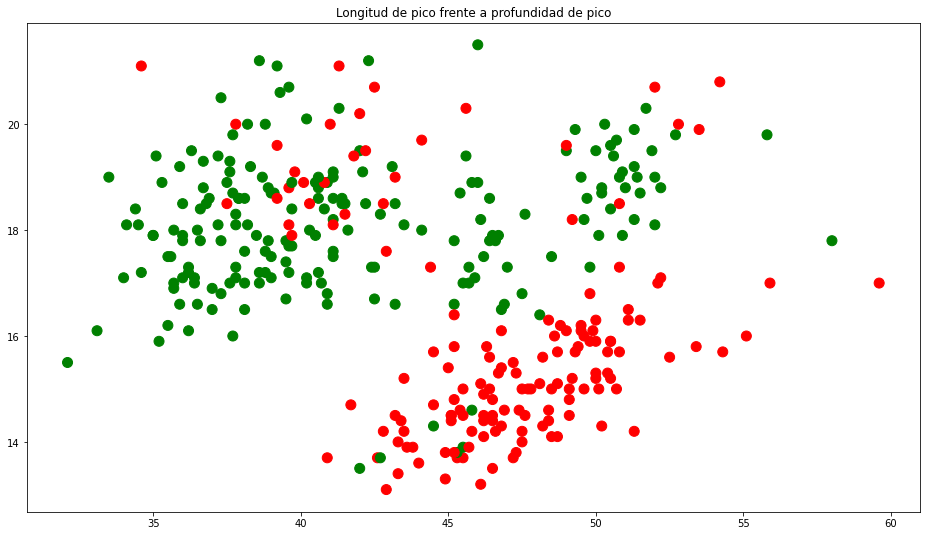

In [18]:
plt.scatter(penguins.culmen_length_mm, penguins.culmen_depth_mm, s=100, color=asignar)
plt.title('Longitud de pico frente a profundidad de pico')

Text(0.5, 1.0, 'Longitud de aleta frente a masa corporal')

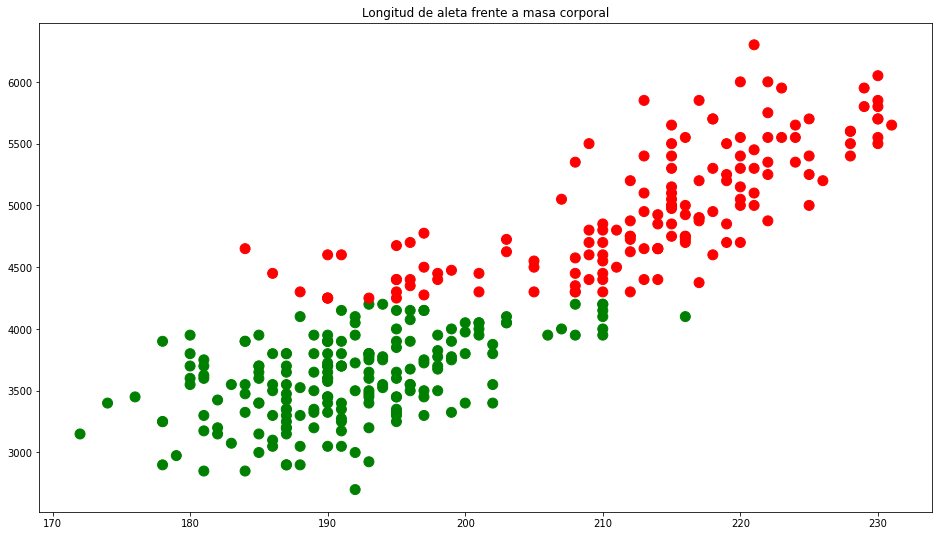

In [19]:
plt.scatter(penguins.flipper_length_mm	, penguins.body_mass_g, s=100, color=asignar)
plt.title('Longitud de aleta frente a masa corporal')

El gráfico 'Longitud de aleta frente a masa corporal' describe mejor la diferencia entre grupos

#Ejercicio 3 Algoritmo K-means

En esta ocasión en lugar de utilizar el dendograma realizaremos el clustering mediante K-means

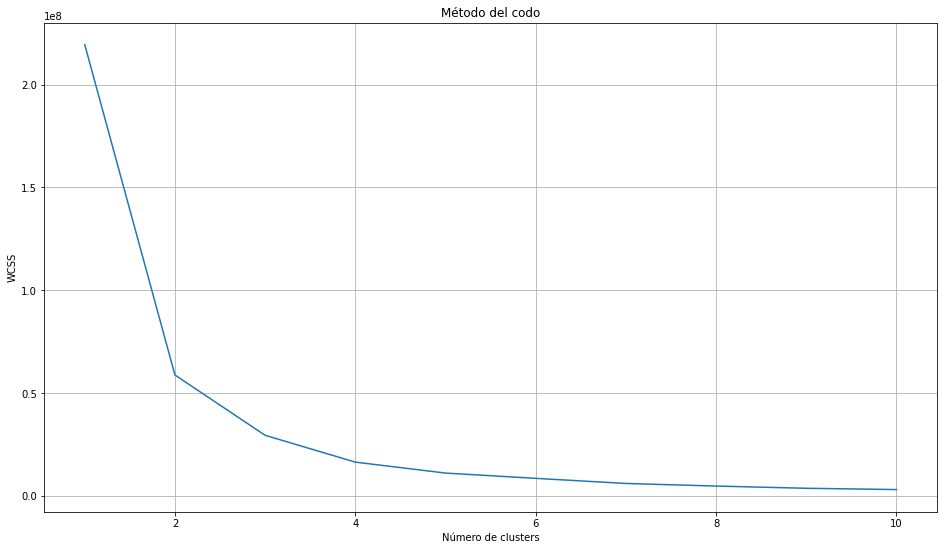

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(penguins)
    wcss.append(kmeans.inertia_)

# graficamos los resultados con el numero de clusters
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

El número óptimo de clusters según el método del codo es 4.

Realizamos la predicción mediante k-means con 4 clusters

In [22]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(penguins)


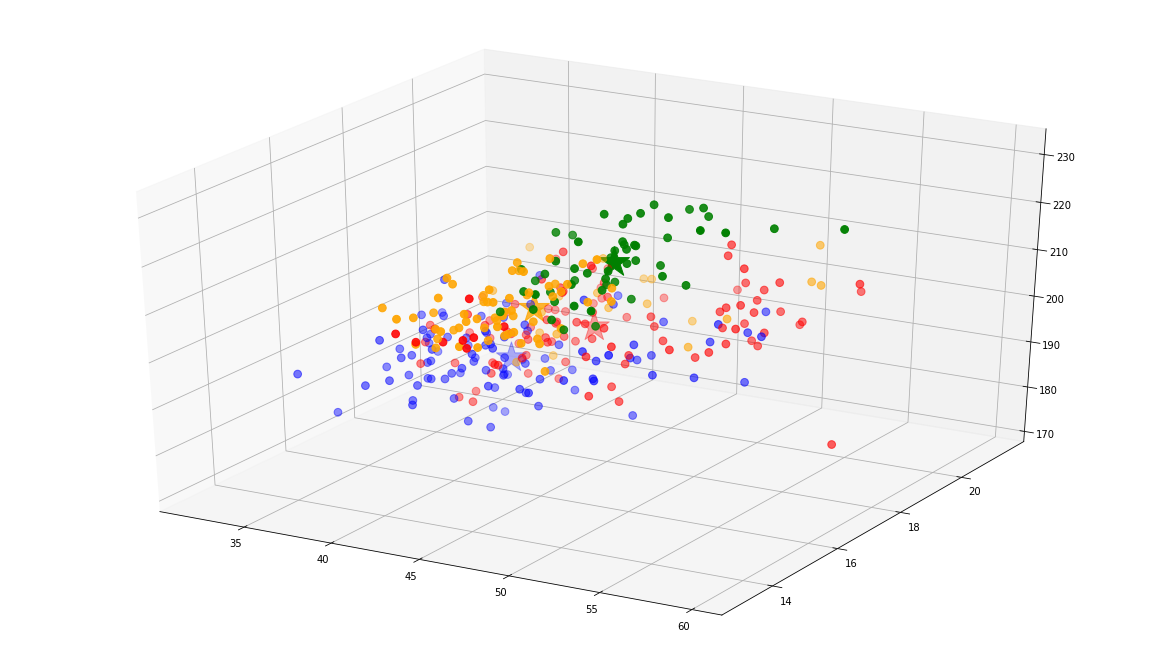

In [23]:
# Predicting the clusters
labels = y_kmeans
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

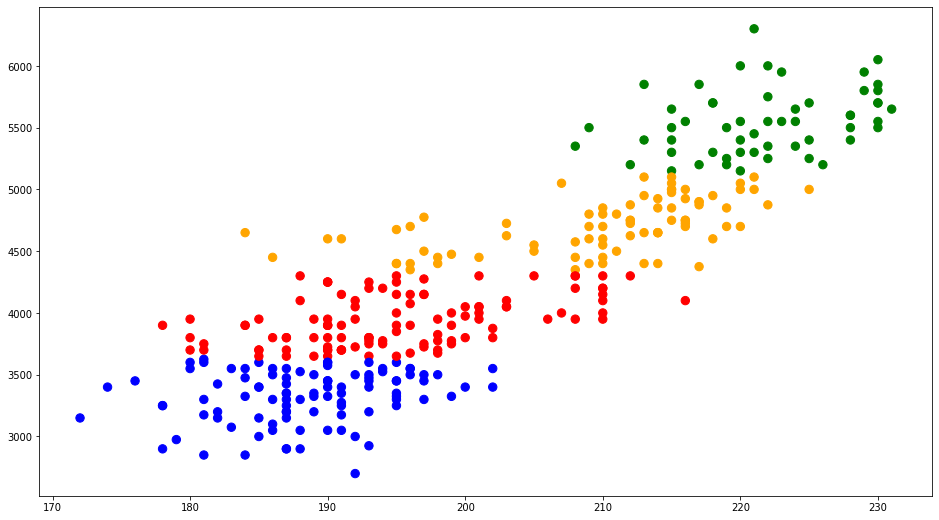

In [31]:
# Getting the values and plotting it
f1 = penguins['flipper_length_mm'].values
f2 = penguins['body_mass_g'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.show()